In [ ]:
# 구글드라이브 코랩 연동하는 코드
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# 코랩 한글 해결 이거 실행하고 위에 런타임 -> 런타임 다시시작 누르고 이거 빼고 나머지 코드실행하면 됨
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (16.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and dir

## 모듈 모음

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score # 훈련데이터,테스트데이터 나누기 / 교차검증
from sklearn.preprocessing import StandardScaler # 데이터 정규화
from sklearn.linear_model import LogisticRegression # 로지스틱회귀 모델
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score, classification_report, f1_score # 모델 평가 모듈들

# 그림그리기
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/breastcancer.csv', encoding = 'cp949')
df.head()
# 유방 종괴 데이터를 토대로 유방암 예측 모델
# 악성 or 양성(악성 = 비정상 / 양성 = 정상) 예측하는 것이기 때문에 이진 분류 모델 로지스틱회귀 사용
# M = 악성, B = 양성

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 데이터 살펴보기 및 전처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.columns # se = 표준오차, worst = 세포핵이 가장 악성인 경우의 평균값 / 우리는 mean만 사용 예정

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## 라벨 인코딩
범주형 데이터를 숫자로 변환 M -> 1 B -> 0


---

https://steadiness-193.tistory.com/243 모듈을 사용하는 방법도 있다.

In [ ]:
# diagnosis 열의 악성/양성 여부를 M = 1 , B = 0으로 변경
def func(x):
  if x == 'M':
    return 1
  else:
    return 0
df['diagnosis1'] = df['diagnosis'].map(func)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis1
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


## 표로 보는 우리가 사용할 데이터
표 보면서 어떠한 경우에 악성이 더 많은지 말하면 될듯

In [ ]:
data = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis1']]
sns.pairplot(data, hue = 'diagnosis1') # hue = 악성(1), 양성(0)에 따라서 색을 다르게 하라
# 악성, 양성별 각 열의 값을 표로 한번에 나타내기

Output hidden; open in https://colab.research.google.com to view.

## features, target 세팅

In [ ]:
# X값 y값 설정
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']] # 평균값이 담긴 열들만 사용
y = df['diagnosis1']

## 훈련데이터, 테스트 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=10) # 0.3 이니까 70퍼센트 30퍼센트로 나눔

## 데이터 정규화(nomalization)
A변수, B변수의 상대적인 크기 차이를 제거해서 각 변수가 예측에 끼치는 영향을 통일
https://soo-jjeong.tistory.com/122

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 데이터를 통계적으로 표준정규분포화 시켜 스케일링
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## 모델 생성
로지스틱 회귀를 이용한 예측 모델을 생성하는 파트
참 or 거짓 두가지를 예측하는거라 이진분류임 그래서 로지스틱 사용

In [ ]:
# 로지스틱 모델 생성, 학습
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## 모델 평가
이 파트는 버리고 아래에 혼동행렬 파트로 평가를 끝낼지

In [ ]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test)) # 이거랑 아래에 정확도 accuracy score랑 같음
print(model.coef_) # 값이 가장 높은게 예측값에 가장 영향을 많이 미친다.
import numpy as np
ind = np.argmax(model.coef_)
print(df.columns[ind]) # smoothness_mean의 가중치가 가장 높다 = 예측에 가장 큰 영향을 미친다.

0.9346733668341709
0.935672514619883
[[ 0.99526749  1.3262506   0.87705189  1.22082084  0.84184991 -0.70137804
   1.39237653  1.31464507  0.27199693 -0.2684817 ]]
smoothness_mean


In [ ]:
y_test # 실제값
y_data = np.array(y_test)
y_data

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
y_pred = model.predict(x_test) # 예측값
y_pred
# 위의 실제값과 비교해보면 거의 동일함

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

## 분류 모델 평가 (혼동행렬)
이 링크가 제일 좋은듯합니다
https://velog.io/@ljs7463/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%AA%A8%EB%8D%B8-%ED%8F%89%EA%B0%80%EC%A0%95%EB%B0%80%EB%8F%84%EC%9E%AC%ED%98%84%EC%9C%A8f1-score%EB%93%B1


---

아래 검증을 다 ppt에 나타낼지 핵심만 나타낼지

In [ ]:
# 혼동행렬 1 = positive, 0 = negative
# TP(True Positive) = 예측값이 1, 실제값이 1 (우측아래)
# FN(False Negative) = 예측값이 0, 실제값이 1 (좌측아래)
# FP(False Positive) = 예측값이 1, 실제값이 0 (우측위)
# TN(True Negative) = 예측값이 0, 실제값이 0 (좌측위)
con_mat = confusion_matrix(y_test, y_pred) # y_test = 실제값, y_pred = 예측값
con_mat

array([[103,   9],
       [  2,  57]])

In [ ]:
# 정확도 = 실제와 예측이 일치한 비율   
# TP + TN / TP + FN + FP + TN         예측 성공 / 전체
acc = accuracy_score(y_test, y_pred)
acc

0.935672514619883

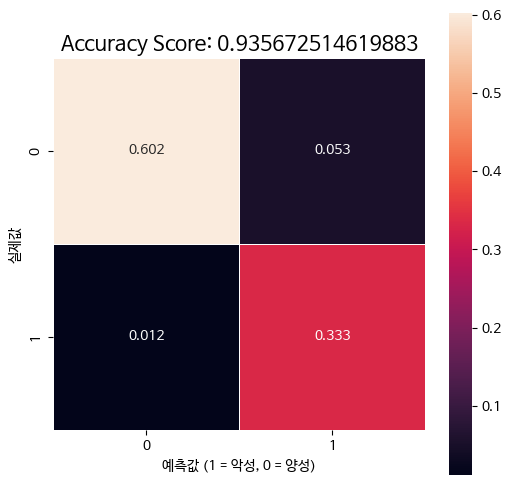

In [ ]:
# 정확도를 heatmap으로 시각화하기
import seaborn as sns
import matplotlib.pyplot as plt

# 혼동행렬 heatmap 시각화
plt.figure(figsize=(6,6))
sns.heatmap(con_mat/np.sum(con_mat), annot=True, fmt=".3f", linewidths=.5, square = True) # 혼동행렬 heatmap fmt = .1f .2f .3f or .1% 등등....
plt.ylabel('실제값'); 
plt.xlabel('예측값 (1 = 악성, 0 = 양성)'); 
all_sample_title = 'Accuracy Score: {0}'.format(acc) 
plt.title(all_sample_title, size = 15) 
plt.show()

In [ ]:
# 정밀도 = 모델이 1로 분류한 A 그룹이 있을때 모델이 얼마나 믿을만한 정도로 A를 만들어냈는가
# TP / TP + FP        1로 예측성공 / 1로 예측한 경우
precision_score(y_test, y_pred)

0.8636363636363636

In [ ]:
# 민감도, 재현도 = 전체 예측중 TP(True Positive)가 얼마나 많은가
# TP / TP + FN       1로 예측성공 / 실제값이 1
recall_score(y_test, y_pred)

0.9661016949152542

In [ ]:
# F1_score 정밀도와 재현율의 조화평균, 주로 분류 클래스 간의 데이터가 불균형이 심각할때 사용
# 값이 높을수록 좋음
f1_score(y_test,y_pred)

0.912

In [ ]:
# 한눈에 보기
c=classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(c)

# precision(정밀도) recall(민감도) accuracy(정확도)
# F1 score = 2*(recall*precision)/(recall+precision)
# macro avg = (normal+abnormal) /2 * precision or recall or f1 score
# weighted avg = normal/(normal+abnormal)  *  precision or recall or f1 score

,0,1,accuracy,macro avg,weighted avg
precision,0.980952,0.863636,0.935673,0.922294,0.940475
recall,0.919643,0.966102,0.935673,0.942872,0.935673
f1-score,0.949309,0.912000,0.935673,0.930654,0.936436
support,112.000000,59.000000,0.935673,171.000000,171.000000


In [ ]:
model.classes_ # 이진 분류 모델 클래스 0 = B 양성, 1 = M 악성

array([0, 1])

In [ ]:
# model.predict_proba(x_test) # 좌측은 y = 0 (B 양성)일 확률, 우측은 y = 1(M 악성)일 확률

## Roc curve
X축(FPR) = 실제 유방암이라고 예측한 것 중 유방암이 아니었던 비율 = FP/(FP+TN)

---

Y축(TPR) = 실제 유방암 환자 중 예측된 유방암 환자 비율이 얼마나 되는지 = TP/(TP+FN)

---
참고링크 : https://dltpgh7060.tistory.com/42
혼동행렬 : https://signature95.tistory.com/48 / https://yogyui.tistory.com/entry/Confusion-Matrix-%ED%98%BC%EB%8F%99%ED%96%89%EB%A0%AC


In [ ]:
# 사이킷런에서 roc_curve는 임계값에 따른 TPR, FPR수치를 자동으로 계산 . threshold 임계값
# roc_curve(타겟값, 1이 예측될 확률)
probs = model.predict_proba(x_test)[:, 1] # 악성이 나올 확률
fpr, tpr, thresholds = roc_curve(y_test, probs)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,2.000000
1,0.000000,0.016949,1.000000
2,0.000000,0.830508,0.908288
3,0.008929,0.830508,0.856494
4,0.008929,0.864407,0.788467
5,0.017857,0.864407,0.776732
6,0.017857,0.881356,0.765215
7,0.026786,0.881356,0.762212
8,0.026786,0.932203,0.731383
9,0.053571,0.932203,0.651822


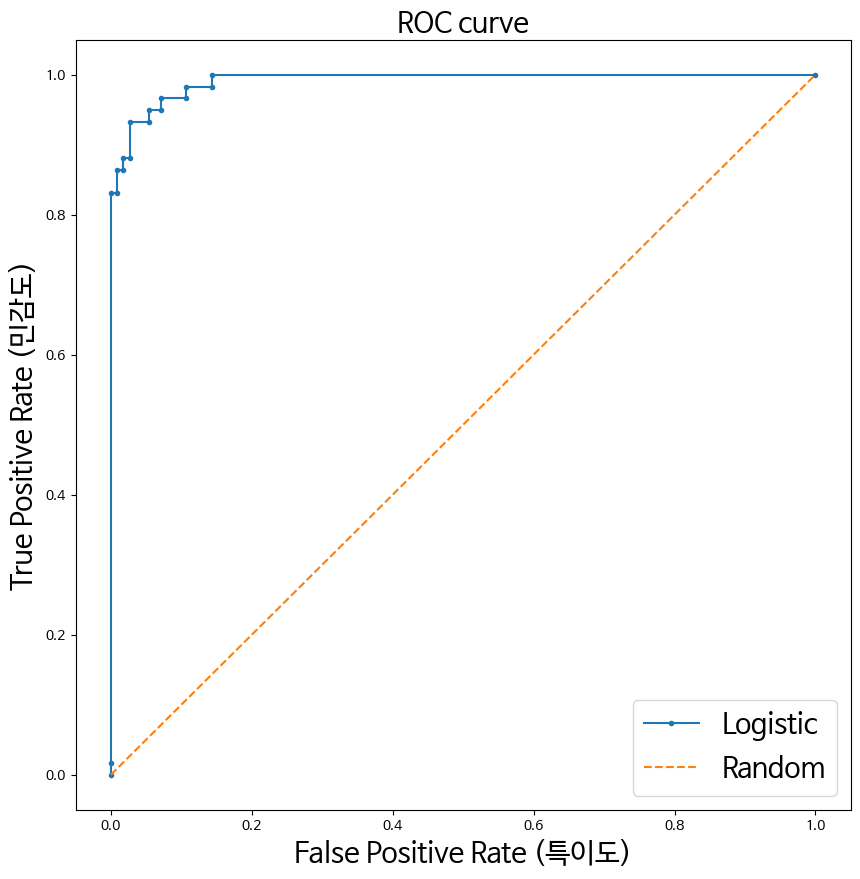

In [ ]:
# Roc curve = 모델의 효율성을 민감도, 특이도를 이용해서 그래프로 나타낸것
probs = model.predict_proba(x_test)[:, 1]

model_fpr, model_tpr, threshold1 = roc_curve(y_test, probs)
random_fpr, random_tpr, threshold2 = roc_curve(y_test, [0 for i in range(x_test.__len__())])

plt.figure(figsize = (10, 10))
plt.plot(model_fpr, model_tpr, marker = '.', label = 'Logistic')
plt.plot(random_fpr, random_tpr, linestyle = '--', label = 'Random')

plt.xlabel('False Positive Rate (특이도)', size = 20)
plt.ylabel('True Positive Rate (민감도)', size = 20)

plt.legend(fontsize = 20)

plt.title('ROC curve', size = 20)
plt.show()

임계값 = 로지스틱이 0.5를 기준으로 0이 나올지 1이 나올지 분류하는건데 여기에서 0.5가 임계값
그래서 아래는 최적의 임계값을 찾아서 예측해보는것

In [ ]:
# 최적의 임계값 찾기
# threshold(임계값) 최대값의 인덱스, np.argmax()
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 8 , threshold: 0.731383335842318


In [ ]:
# 최적의 임계값을 사용해서 예측
predict =  (model.predict_proba(x_test)[:,1] >= optimal_threshold)
# 1의 예측값만 불러와도 되므로 [:,1]사용
predict = predict.astype(int)
print(predict) # 예측값
print(np.array(y_test)) # 실제값

[1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0]
[1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0]


In [ ]:
# auc_score = roc curve 밑의 면적
# auc score 구할때 0 or 1을 예측할 확률 사용해야함
pred_proba = model.predict_proba(x_test)[:,1] # 악성(1)을 예측할 확률
roc_score = roc_auc_score(y_test, pred_proba)
roc_score

0.991676755447942

## 교차 검증
cross validation
https://jhryu1208.github.io/data/2021/01/24/ML_cross_validation/#1-1)-scikit-learn%EC%97%90%EC%84%9C%EC%9D%98-%EA%B5%90%EC%B0%A8-%EA%B2%80%EC%A6%9D-(cross_val_score-&-cross_validate)

In [ ]:
scores = cross_val_score(model, x_train, y_train, cv=5)  # cv는 원하는 교차 검증 폴드 수를 설정합니다.
mean_accuracy = scores.mean()
print(f"평균 정확도: {mean_accuracy}")

평균 정확도: 0.9370569620253164
